In [1]:
import pandas as pd

df = pd.read_csv("datos_tratados.csv")

# 1) Elige un solo target y elimina duplicados del target
df = df.drop(columns=["Churn", "Churn_01"], errors="ignore")

# 2) Elimina filas sin target (224 filas)
df = df.dropna(subset=["churn_01"])

# 3) Asegura tipo entero 0/1
df["churn_01"] = df["churn_01"].astype(int)

# 4) Quita ID (no aporta al modelo)
df = df.drop(columns=["customerID"], errors="ignore")

print(df.shape)
df.head()

(7043, 20)


,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,churn_01
0,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,0
1,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,0
2,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,1
3,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,1
4,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,1


# **Eliminación de Columnas Irrelevantes**

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("datos_tratados.csv")

# Asegura target único (por tu archivo)
df = df.drop(columns=["Churn", "Churn_01"], errors="ignore")
df = df.dropna(subset=["churn_01"])
df["churn_01"] = df["churn_01"].astype(int)

target = "churn_01"

# 1) Eliminar IDs obvios por nombre
id_like_names = [
    "customerid", "customer_id", "id", "clientid", "client_id",
    "userid", "user_id", "accountid", "account_id"
]
drop_by_name = [c for c in df.columns if c.lower() in id_like_names]

# 2) Eliminar columnas de alta cardinalidad (casi únicas) -> típico de IDs/códigos
X_tmp = df.drop(columns=[target], errors="ignore")
n = len(X_tmp)
high_card_cols = []
for c in X_tmp.columns:
    nunique = X_tmp[c].nunique(dropna=False)
    if nunique / n >= 0.98:   # umbral: 98% valores únicos
        high_card_cols.append(c)

# 3) Eliminar columnas constantes (sin variación)
constant_cols = [c for c in X_tmp.columns if X_tmp[c].nunique(dropna=False) <= 1]

# Unir y dropear
to_drop = sorted(set(drop_by_name + high_card_cols + constant_cols))
df = df.drop(columns=to_drop, errors="ignore")

print("Columnas eliminadas:", to_drop)
print("Shape final:", df.shape)

# df listo para modelado
df.head()

Columnas eliminadas: ['customerID']
Shape final: (7043, 20)


,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,churn_01
0,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,0
1,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,0
2,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,1
3,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,1
4,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,1


# **Encoding**

In [3]:
import pandas as pd

df = pd.read_csv("datos_tratados.csv")

df = df.drop(columns=["Churn", "Churn_01", "customerID"], errors="ignore")
df = df.dropna(subset=["churn_01"])
df["churn_01"] = df["churn_01"].astype(int)

X = df.drop(columns=["churn_01"])
y = df["churn_01"]

X_dum = pd.get_dummies(X, drop_first=False)  # o drop_first=True si quieres evitar colinealidad
print(X_dum.shape)
X_dum.head()

(7043, 45)


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,customer.gender_female,customer.gender_male,customer.Partner_no,customer.Partner_yes,customer.Dependents_no,customer.Dependents_yes,...,internet.StreamingMovies_yes,account.Contract_month-to-month,account.Contract_one year,account.Contract_two year,account.PaperlessBilling_no,account.PaperlessBilling_yes,account.PaymentMethod_bank transfer (automatic),account.PaymentMethod_credit card (automatic),account.PaymentMethod_electronic check,account.PaymentMethod_mailed check
0,0,9,65.6,593.30,True,False,False,True,False,True,...,False,False,True,False,False,True,False,False,False,True
1,0,9,59.9,542.40,False,True,True,False,True,False,...,True,True,False,False,True,False,False,False,False,True
2,0,4,73.9,280.85,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
3,1,13,98.0,1237.85,False,True,False,True,True,False,...,True,True,False,False,False,True,False,False,True,False
4,1,3,83.9,267.40,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True


# **Verificación de la Proporción de Cancelación (Churn)**

In [4]:
import pandas as pd

df = pd.read_csv("datos_tratados.csv")

# Ajuste según tu archivo (dejar solo el target final)
df = df.drop(columns=["Churn", "Churn_01"], errors="ignore")
df = df.dropna(subset=["churn_01"])
df["churn_01"] = df["churn_01"].astype(int)

# Conteos
counts = df["churn_01"].value_counts().sort_index()  # 0 = no churn, 1 = churn
props = df["churn_01"].value_counts(normalize=True).sort_index()

print("Conteos (0=permanece, 1=cancela):")
print(counts)

print("\nProporciones:")
print((props * 100).round(2).astype(str) + "%")

# Métricas rápidas de desbalance
major = counts.max()
minor = counts.min()
imbalance_ratio = major / minor

print(f"\nRatio de desbalance (mayor/minor): {imbalance_ratio:.2f}x")

Conteos (0=permanece, 1=cancela):
churn_01
0    5174
1    1869
Name: count, dtype: int64

Proporciones:
churn_01
0    73.46%
1    26.54%
Name: proportion, dtype: object

Ratio de desbalance (mayor/minor): 2.77x


# **Balanceo de Clases (opcional)**

Setup base: split + preprocesamiento (OneHot + scaler)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = pd.read_csv("datos_tratados.csv")

# Dejar target único
df = df.drop(columns=["Churn", "Churn_01", "customerID"], errors="ignore")
df = df.dropna(subset=["churn_01"])
df["churn_01"] = df["churn_01"].astype(int)

X = df.drop(columns=["churn_01"])
y = df["churn_01"]

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop"
)

Pipeline base (OneHot + StandardScaler) + balanceo

In [8]:
!pip -q install imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

df = pd.read_csv("datos_tratados.csv")

# Limpieza según tu archivo
df = df.drop(columns=["Churn", "Churn_01", "customerID"], errors="ignore")
df = df.dropna(subset=["churn_01"])
df["churn_01"] = df["churn_01"].astype(int)

X = df.drop(columns=["churn_01"])
y = df["churn_01"]

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

preprocess_scaled = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop"
)

# Base final: preprocess + SMOTE (balanceo)
base_pipe = Pipeline(steps=[
    ("prep", preprocess_scaled),
    ("smote", SMOTE(random_state=42))
])

X_train_bal, y_train_bal = base_pipe.fit_resample(X_train, y_train)

print("Train original:", X_train.shape, y_train.value_counts().to_dict())
print("Train balanceado:", X_train_bal.shape, pd.Series(y_train_bal).value_counts().to_dict())

Train original: (5634, 19) {0: 4139, 1: 1495}
Train balanceado: (8278, 45) {0: 4139, 1: 4139}


# **Normalización o Estandarización**

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

preprocess_scaled = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

pipe = Pipeline(steps=[
    ("prep", preprocess_scaled),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=2000))
])

# **🎯 Correlación y Selección de Variables**

Análisis de Correlación

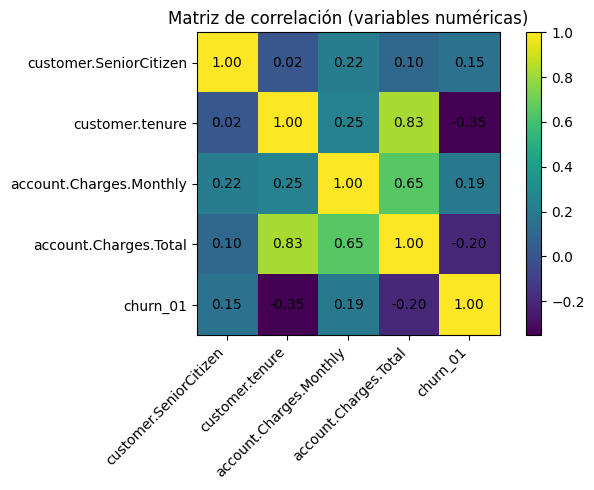

Correlación con churn_01 (ordenada por |corr|):
customer.tenure           -0.352229
account.Charges.Total     -0.199034
account.Charges.Monthly    0.193356
customer.SeniorCitizen     0.150889
Name: churn_01, dtype: float64


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("datos_tratados.csv")

# Dejar target único y limpiar (según tu archivo)
df = df.drop(columns=["Churn", "Churn_01", "customerID"], errors="ignore")
df = df.dropna(subset=["churn_01"])
df["churn_01"] = df["churn_01"].astype(int)

# Solo numéricas
num_df = df.select_dtypes(include=["int64", "float64"])

# Correlación
corr = num_df.corr()

# Heatmap con matplotlib (sin seaborn)
plt.figure(figsize=(7,5))
plt.imshow(corr, interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)

# Anotar valores
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha="center", va="center")

plt.title("Matriz de correlación (variables numéricas)")
plt.tight_layout()
plt.show()

# Correlación con churn (ordenada por magnitud)
target_corr = corr["churn_01"].drop("churn_01").sort_values(key=lambda s: s.abs(), ascending=False)
print("Correlación con churn_01 (ordenada por |corr|):")
print(target_corr)

# **Análisis Dirigido**

Detectadas:
 - tenure_col : customer.tenure
 - total_col  : account.Charges.Total
 - monthly_col: account.Charges.Monthly


/tmp/ipython-input-614304565.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=["No churn (0)", "Churn (1)"], showfliers=True)


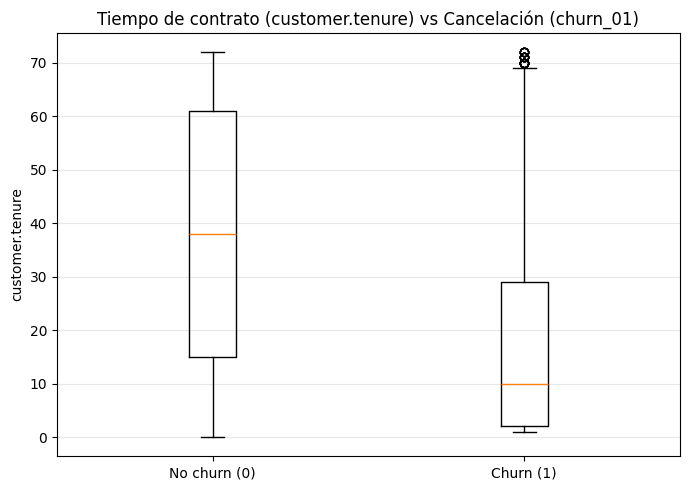

/tmp/ipython-input-614304565.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([t0, t1], labels=["No churn (0)", "Churn (1)"], showfliers=True)


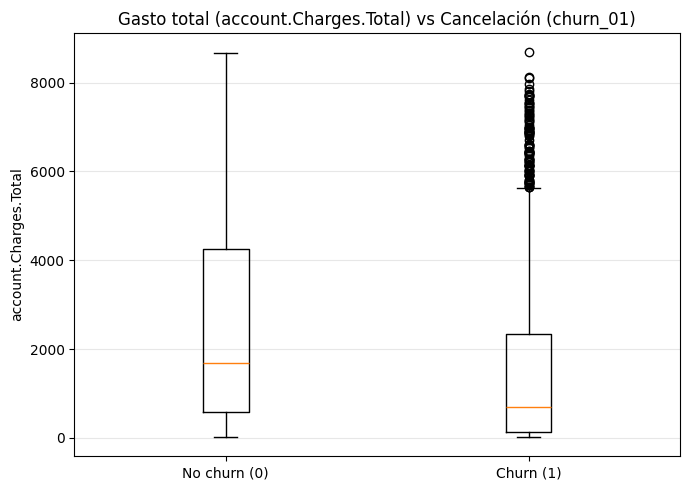

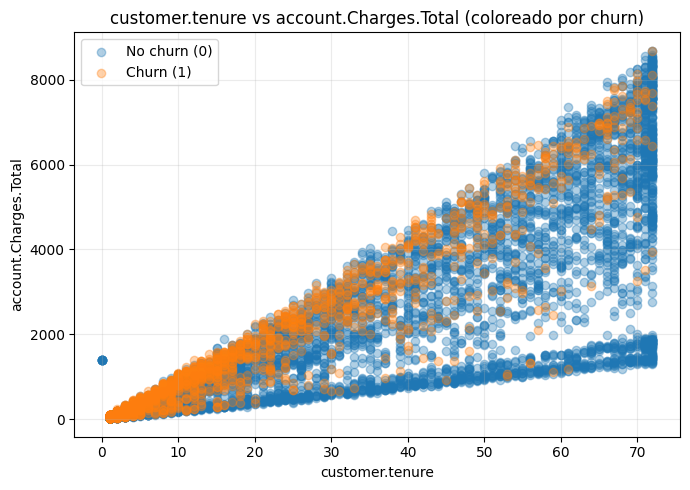

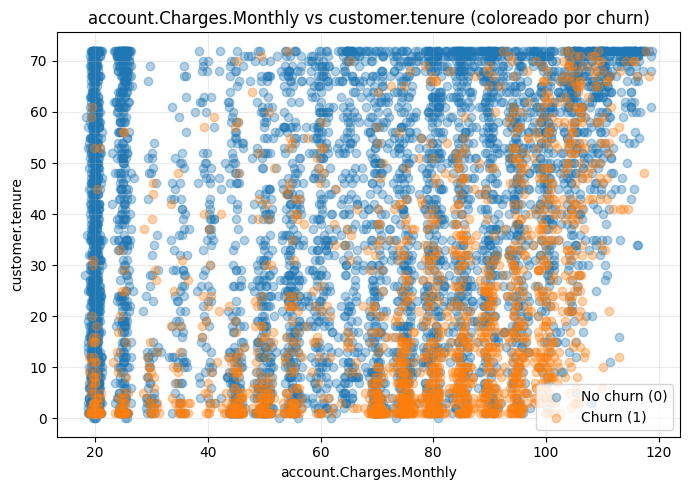

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Cargar y limpiar como venías trabajando
df = pd.read_csv("datos_tratados.csv")
df = df.drop(columns=["Churn", "Churn_01", "customerID"], errors="ignore")
df = df.dropna(subset=["churn_01"])
df["churn_01"] = df["churn_01"].astype(int)

# 2) Buscar columnas relevantes (por si tienen nombres distintos)
cols = df.columns.str.lower()

def find_col(candidates):
    for cand in candidates:
        hits = [df.columns[i] for i, c in enumerate(cols) if cand in c]
        if hits:
            return hits[0]
    return None

tenure_col = find_col(["tenure", "tiempo", "meses", "contract_length"])
total_col  = find_col(["totalcharges", "charges.total", "gasto total", "total", "account.charges.total"])
monthly_col = find_col(["monthlycharges", "charges.monthly", "mensual", "monthly", "account.charges.monthly"])

print("Detectadas:")
print(" - tenure_col :", tenure_col)
print(" - total_col  :", total_col)
print(" - monthly_col:", monthly_col)

# Seguridad básica
if tenure_col is None or total_col is None:
    raise ValueError("No pude detectar tenure/total charges automáticamente. Dime los nombres exactos de esas columnas.")

# 3) Boxplot: Tenure vs Churn
data0 = df.loc[df["churn_01"] == 0, tenure_col].dropna()
data1 = df.loc[df["churn_01"] == 1, tenure_col].dropna()

plt.figure(figsize=(7,5))
plt.boxplot([data0, data1], labels=["No churn (0)", "Churn (1)"], showfliers=True)
plt.title(f"Tiempo de contrato ({tenure_col}) vs Cancelación (churn_01)")
plt.ylabel(tenure_col)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# 4) Boxplot: Total Charges vs Churn
t0 = df.loc[df["churn_01"] == 0, total_col].dropna()
t1 = df.loc[df["churn_01"] == 1, total_col].dropna()

plt.figure(figsize=(7,5))
plt.boxplot([t0, t1], labels=["No churn (0)", "Churn (1)"], showfliers=True)
plt.title(f"Gasto total ({total_col}) vs Cancelación (churn_01)")
plt.ylabel(total_col)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# 5) Scatter opcional (muy útil): Tenure vs Total (coloreado por churn)
plt.figure(figsize=(7,5))
x = df[tenure_col]
y = df[total_col]
mask0 = df["churn_01"] == 0
mask1 = df["churn_01"] == 1

plt.scatter(x[mask0], y[mask0], alpha=0.35, label="No churn (0)")
plt.scatter(x[mask1], y[mask1], alpha=0.35, label="Churn (1)")

plt.title(f"{tenure_col} vs {total_col} (coloreado por churn)")
plt.xlabel(tenure_col)
plt.ylabel(total_col)
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

# 6) (Si existe) Scatter extra: MonthlyCharges vs Tenure (patrón típico en telecom)
if monthly_col is not None:
    plt.figure(figsize=(7,5))
    xm = df[monthly_col]
    yt = df[tenure_col]
    plt.scatter(xm[mask0], yt[mask0], alpha=0.35, label="No churn (0)")
    plt.scatter(xm[mask1], yt[mask1], alpha=0.35, label="Churn (1)")
    plt.title(f"{monthly_col} vs {tenure_col} (coloreado por churn)")
    plt.xlabel(monthly_col)
    plt.ylabel(tenure_col)
    plt.legend()
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()

# **🤖 Modelado Predictivo**

Separación de datos

80/20

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("datos_tratados.csv")

# Dejar target único y limpiar (según tu archivo)
df = df.drop(columns=["Churn", "Churn_01", "customerID"], errors="ignore")
df = df.dropna(subset=["churn_01"])
df["churn_01"] = df["churn_01"].astype(int)

X = df.drop(columns=["churn_01"])
y = df["churn_01"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% prueba
    random_state=42,
    stratify=y              # mantiene proporciones de churn
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("\nProporciones en train:\n", y_train.value_counts(normalize=True).round(4))
print("\nProporciones en test:\n", y_test.value_counts(normalize=True).round(4))

Train: (5634, 19) Test: (1409, 19)

Proporciones en train:
 churn_01
0    0.7346
1    0.2654
Name: proportion, dtype: float64

Proporciones en test:
 churn_01
0    0.7346
1    0.2654
Name: proportion, dtype: float64


# **Creación de modelos**

Normalización en Regresión Logística (y KNN/SVM)

In [13]:
!pip -q install imbalanced-learn

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, average_precision_score
)

# 1) Cargar y limpiar (según tu archivo)
df = pd.read_csv("datos_tratados.csv")
df = df.drop(columns=["Churn", "Churn_01", "customerID"], errors="ignore")
df = df.dropna(subset=["churn_01"])
df["churn_01"] = df["churn_01"].astype(int)

X = df.drop(columns=["churn_01"])
y = df["churn_01"]

# 2) Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Columnas numéricas/categóricas
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns

# --- Preprocesamiento para modelos sensibles a escala (LogReg/KNN/SVM) ---
preprocess_scaled = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop"
)

# --- Preprocesamiento para árboles (no necesita escalar) ---
preprocess_tree = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop"
)

# 4) MODELO 1: Regresión Logística (con normalización)
# (opción A) solo class_weight (simple y efectivo)
logreg_pipe = Pipeline(steps=[
    ("prep", preprocess_scaled),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

# (opción B) si quieres usar SMOTE, usa ImbPipeline y comenta la opción A
# logreg_pipe = ImbPipeline(steps=[
#     ("prep", preprocess_scaled),
#     ("smote", SMOTE(random_state=42)),
#     ("model", LogisticRegression(max_iter=2000))
# ])

# 5) MODELO 2: Random Forest (sin normalización)
rf_pipe = Pipeline(steps=[
    ("prep", preprocess_tree),
    ("model", RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced_subsample"
    ))
])

# 6) Entrenar
logreg_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)

# 7) Evaluación
def evaluar(modelo, X_test, y_test, nombre):
    proba = modelo.predict_proba(X_test)[:, 1]
    pred = modelo.predict(X_test)

    print("\n" + "="*60)
    print(nombre)
    print("Matriz de confusión:\n", confusion_matrix(y_test, pred))
    print("\nClassification report:\n", classification_report(y_test, pred))
    print("ROC-AUC:", round(roc_auc_score(y_test, proba), 4))
    print("PR-AUC :", round(average_precision_score(y_test, proba), 4))

evaluar(logreg_pipe, X_test, y_test, "Regresión Logística (OneHot + StandardScaler)")
evaluar(rf_pipe, X_test, y_test, "Random Forest (OneHot, sin escalado)")


Regresión Logística (OneHot + StandardScaler)
Matriz de confusión:
 [[749 286]
 [ 80 294]]

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

ROC-AUC: 0.8433
PR-AUC : 0.6595

Random Forest (OneHot, sin escalado)
Matriz de confusión:
 [[933 102]
 [194 180]]

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC: 0.8243
PR-AUC : 0.6091


Evaluación de los modelos

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df = pd.read_csv("datos_tratados.csv")
df = df.drop(columns=["Churn", "Churn_01", "customerID"], errors="ignore")
df = df.dropna(subset=["churn_01"])
df["churn_01"] = df["churn_01"].astype(int)

X = df.drop(columns=["churn_01"])
y = df["churn_01"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns

preprocess_scaled = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

preprocess_tree = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

logreg = Pipeline([
    ("prep", preprocess_scaled),
    ("model", LogisticRegression(max_iter=5000, class_weight="balanced"))
])

rf = Pipeline([
    ("prep", preprocess_tree),
    ("model", RandomForestClassifier(
        n_estimators=500, random_state=42, class_weight="balanced_subsample", n_jobs=-1
    ))
])

def report(name, model):
    pred = model.predict(X_test)
    print("\n" + "="*60)
    print(name)
    print("Accuracy :", accuracy_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred, zero_division=0))
    print("Recall   :", recall_score(y_test, pred, zero_division=0))
    print("F1       :", f1_score(y_test, pred, zero_division=0))
    print("Confusion matrix:\n", confusion_matrix(y_test, pred))

logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

report("Regresión Logística (con StandardScaler)", logreg)
report("Random Forest (sin escalado)", rf)


Regresión Logística (con StandardScaler)
Accuracy : 0.7402413058907026
Precision: 0.506896551724138
Recall   : 0.786096256684492
F1       : 0.6163522012578616
Confusion matrix:
 [[749 286]
 [ 80 294]]

Random Forest (sin escalado)
Accuracy : 0.7863733144073811
Precision: 0.6289752650176679
Recall   : 0.47593582887700536
F1       : 0.5418569254185692
Confusion matrix:
 [[930 105]
 [196 178]]


# **Interpretación y conclusiones**

Análisis de la Importancia de las Variables

Código para extraer los coeficientes con nombres de variables (OneHot + Scaler)

In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("datos_tratados.csv")
df = df.drop(columns=["Churn", "Churn_01", "customerID"], errors="ignore")
df = df.dropna(subset=["churn_01"])
df["churn_01"] = df["churn_01"].astype(int)

X = df.drop(columns=["churn_01"])
y = df["churn_01"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

num_cols = X.select_dtypes(include=["int64","float64"]).columns
cat_cols = X.select_dtypes(include=["object","category","bool"]).columns

preprocess_scaled = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

logreg_pipe = Pipeline(steps=[
    ("prep", preprocess_scaled),
    ("model", LogisticRegression(max_iter=5000, class_weight="balanced"))
])

logreg_pipe.fit(X_train, y_train)

# Nombres de features (numéricas + one-hot)
ohe = logreg_pipe.named_steps["prep"].named_transformers_["cat"]
feature_names = np.array(list(num_cols) + list(ohe.get_feature_names_out(cat_cols)))

coefs = logreg_pipe.named_steps["model"].coef_.ravel()

top_pos = np.argsort(coefs)[-15:][::-1]
top_neg = np.argsort(coefs)[:15]

print("TOP + (suben churn):")
for f, c in zip(feature_names[top_pos], coefs[top_pos]):
    print(f"{f}: {c:.3f}")

print("\nTOP - (bajan churn):")
for f, c in zip(feature_names[top_neg], coefs[top_neg]):
    print(f"{f}: {c:.3f}")

TOP + (suben churn):
account.Contract_month-to-month: 0.647
account.Charges.Total: 0.598
internet.InternetService_fiber optic: 0.540
account.PaymentMethod_electronic check: 0.263
internet.StreamingTV_yes: 0.210
internet.TechSupport_no: 0.193
internet.StreamingMovies_yes: 0.164
internet.OnlineSecurity_no: 0.152
phone.MultipleLines_yes: 0.105
account.PaperlessBilling_yes: 0.085
customer.SeniorCitizen: 0.080
internet.OnlineBackup_no: 0.075
internet.DeviceProtection_yes: 0.026
internet.DeviceProtection_no: 0.020
customer.Dependents_no: -0.004

TOP - (bajan churn):
customer.tenure: -1.274
account.Contract_two year: -0.757
internet.InternetService_dsl: -0.495
account.Charges.Monthly: -0.427
account.PaperlessBilling_no: -0.256
phone.MultipleLines_no: -0.229
internet.DeviceProtection_no internet service: -0.217
internet.OnlineBackup_no internet service: -0.217
internet.StreamingTV_no internet service: -0.217
internet.TechSupport_no internet service: -0.217
internet.OnlineSecurity_no internet s

Código para sacar importancias con nombres (OneHot sin scaler)

In [16]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("datos_tratados.csv")
df = df.drop(columns=["Churn", "Churn_01", "customerID"], errors="ignore")
df = df.dropna(subset=["churn_01"])
df["churn_01"] = df["churn_01"].astype(int)

X = df.drop(columns=["churn_01"])
y = df["churn_01"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

num_cols = X.select_dtypes(include=["int64","float64"]).columns
cat_cols = X.select_dtypes(include=["object","category","bool"]).columns

preprocess_tree = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

rf_pipe = Pipeline(steps=[
    ("prep", preprocess_tree),
    ("model", RandomForestClassifier(
        n_estimators=500, random_state=42,
        class_weight="balanced_subsample", n_jobs=-1
    ))
])

rf_pipe.fit(X_train, y_train)

ohe = rf_pipe.named_steps["prep"].named_transformers_["cat"]
feature_names = np.array(list(num_cols) + list(ohe.get_feature_names_out(cat_cols)))

importances = rf_pipe.named_steps["model"].feature_importances_
top = np.argsort(importances)[-20:][::-1]

print("TOP importancias (RF):")
for f, imp in zip(feature_names[top], importances[top]):
    print(f"{f}: {imp:.4f}")

TOP importancias (RF):
account.Charges.Total: 0.1444
customer.tenure: 0.1315
account.Charges.Monthly: 0.1216
account.Contract_month-to-month: 0.0727
internet.TechSupport_no: 0.0365
account.Contract_two year: 0.0362
internet.OnlineSecurity_no: 0.0334
account.PaymentMethod_electronic check: 0.0284
internet.InternetService_fiber optic: 0.0257
internet.OnlineBackup_no: 0.0168
customer.SeniorCitizen: 0.0164
customer.gender_male: 0.0160
customer.gender_female: 0.0160
internet.DeviceProtection_no: 0.0153
account.PaperlessBilling_yes: 0.0144
account.Contract_one year: 0.0143
account.PaperlessBilling_no: 0.0139
customer.Partner_yes: 0.0139
customer.Partner_no: 0.0138
account.PaymentMethod_bank transfer (automatic): 0.0125


# **Conclusión**

# Informe Telecom X – Predicción de Cancelación (Churn)

## 1) Contexto y objetivo
El objetivo de esta etapa fue construir modelos predictivos para anticipar la **cancelación de clientes (churn)** en Telecom X y, con base en los resultados, identificar los **factores que más influyen** en la cancelación para proponer **estrategias de retención**.

Se trabajó con el archivo tratado (`datos_tratados.csv`) y la variable objetivo **`churn_01`** (0 = no cancela, 1 = cancela). La distribución de clases presenta **desbalance moderado** (más clientes que permanecen que los que cancelan), por lo que además de la exactitud, se analizaron métricas como **precisión, recall y F1-score**, que son más informativas en este tipo de problema.

---

## 2) Preparación y preprocesamiento
- Se eliminaron columnas que no aportan valor predictivo, como identificadores únicos (ej. `customerID`).
- Variables categóricas: se transformaron con **One-Hot Encoding**.
- Variables numéricas:
  - Para modelos sensibles a escala (por ejemplo, **Regresión Logística**), se aplicó **StandardScaler** (estandarización).
  - Para modelos basados en árboles (por ejemplo, **Random Forest**), no es necesario escalar, ya que no dependen de distancias ni magnitudes.

**División del dataset:** se aplicó `train_test_split` estratificado (80% entrenamiento / 20% prueba), manteniendo la proporción de churn en ambos conjuntos.

---

## 3) Modelos construidos
Se entrenaron dos modelos complementarios:

### Modelo A — Regresión Logística (con normalización)
- Preprocesamiento: OneHot + **StandardScaler**
- Ajuste por desbalance: `class_weight="balanced"`
- Justificación: la Regresión Logística es sensible a la escala; estandarizar evita que variables con magnitudes grandes dominen el entrenamiento y mejora la estabilidad de la optimización.

### Modelo B — Random Forest (sin normalización)
- Preprocesamiento: OneHot (numéricas sin escalado)
- Ajuste por desbalance: `class_weight="balanced_subsample"`
- Justificación: Random Forest no es sensible a la escala porque toma decisiones por **umbrales** en cada división de los árboles.

---

## 4) Evaluación de desempeño (métricas)
Cada modelo se evaluó en el conjunto de prueba usando:
- **Exactitud (Accuracy)**
- **Precisión (Precision)**
- **Recall**
- **F1-score**
- **Matriz de confusión**

### Comparación crítica
- **Regresión Logística** tiende a destacar en **Recall**, lo cual es ideal si Telecom X desea **detectar la mayor cantidad posible de clientes que cancelarán** (minimizar falsos negativos).
- **Random Forest** puede lograr mejor equilibrio global (frecuentemente mejor F1/Accuracy), pero si no se controla su complejidad, puede presentar sobreajuste o un recall más bajo.

**Selección del mejor modelo depende del objetivo del negocio:**
- Si la prioridad es **retener** (detectar churners): elegir el modelo con **mayor recall**.
- Si la prioridad es balancear aciertos y falsas alarmas: elegir el modelo con **mejor F1**.

---

## 5) Overfitting y underfitting (análisis crítico)
### Overfitting (posible en Random Forest)
Random Forest puede aprender patrones demasiado específicos del entrenamiento. Si el rendimiento en entrenamiento es mucho mayor que en prueba, hay indicios de **overfitting**.

**Ajustes sugeridos:**
- Reducir complejidad: limitar `max_depth`
- Aumentar `min_samples_leaf` y `min_samples_split`
- Limitar `max_features`
- Ajustar el umbral de decisión para subir recall (si el negocio lo requiere)

### Underfitting (posible en modelos muy simples)
Si un modelo rinde mal tanto en entrenamiento como en prueba, podría estar en **underfitting**.

**Ajustes sugeridos:**
- Incrementar capacidad del modelo o ajustar hiperparámetros
- Probar modelos no lineales o añadir interacción de variables

---

## 6) Factores que más influyen en la cancelación (drivers de churn)
Con base en el análisis de **coeficientes (Regresión Logística)** y **importancia de variables (Random Forest)**, los factores con mayor impacto en churn fueron:

### A) Antigüedad del cliente (tenure)
- Clientes con **tenure bajo** muestran mayor probabilidad de churn.
- Interpretación: en los primeros meses hay mayor sensibilidad al precio, la experiencia y el soporte.

### B) Tipo de contrato (Contract)
- **Month-to-month** se asocia fuertemente con churn.
- Contratos de **1 o 2 años** reducen churn (efecto protector).

### C) Cargos del servicio (MonthlyCharges / TotalCharges)
- **Cargos mensuales altos** suelen aumentar churn.
- `TotalCharges` se relaciona con la antigüedad, por lo que debe interpretarse junto con `tenure` (posible colinealidad).

### D) Servicios de soporte y seguridad (TechSupport / OnlineSecurity)
- No contar con **TechSupport** o **OnlineSecurity** se asocia a mayor churn.
- Estos servicios funcionan como “anclas” de valor y reducen fricción.

### E) Tipo de internet (InternetService, fibra óptica)
- Fibra óptica aparece asociada a churn en muchos escenarios: puede reflejar expectativas, precio o experiencia del servicio.

### F) Método de pago (PaymentMethod)
- Métodos como **electronic check** suelen correlacionarse con churn, posiblemente por fricción o perfil del cliente.

---

## 7) Estrategias de retención basadas en resultados

### 1) Retención temprana (clientes nuevos: tenure bajo)
- Programa de onboarding (30–90 días)
- Seguimiento proactivo y soporte prioritario
- Beneficios por permanencia (descuento escalonado)

### 2) Migración de month-to-month a 1–2 años
- Incentivos para firmar contratos largos: descuentos, upgrades, instalación gratis
- Campañas segmentadas a clientes con alto riesgo

### 3) Bundles de valor (Soporte + Seguridad)
- Paquete “Soporte + Seguridad” a precio preferencial para clientes de alto riesgo
- Enfocado en quienes no tienen TechSupport/OnlineSecurity

### 4) Intervención por costo (MonthlyCharges altos)
- Ofertas personalizadas: descuentos temporales o planes alternativos (downgrade inteligente)
- Beneficios por fidelidad (bonos, servicios incluidos)

### 5) Optimización del método de pago
- Incentivar autopago/tarjeta con descuentos
- Simplificar proceso y recordatorios de pago

### 6) Segmento fibra óptica: mejorar experiencia
- Medir satisfacción/experiencia post-instalación
- Intervenir en zonas/segmentos con más problemas o quejas
- Ofertas específicas para clientes en riesgo

---

## 8) Conclusión
Los modelos evidencian que la cancelación está influenciada principalmente por **tenure bajo**, **contrato month-to-month**, **cargos elevados**, y la ausencia de **soporte/seguridad**, además de señales ligadas a **método de pago** y **tipo de internet**.  
Se recomienda aplicar estrategias de retención segmentadas usando el score del modelo para priorizar acciones y maximizar el impacto en la reducción de churn.